In [12]:
# ===============================================================
# 🏙️ Projet Clara Benali : "Chasseuse de Quartiers Innovants"
# Objectif : Identifier les quartiers attractifs, durables et rentables
# ===============================================================

# ---------------------------------------------------------------
# 1️⃣ Importation des bibliothèques nécessaires
# ---------------------------------------------------------------
# Ces librairies permettent :
# - de manipuler et analyser les données (pandas, numpy)
# - de créer des graphiques clairs (matplotlib, seaborn)
# - d’ajouter de l’interactivité (ipywidgets)
# ---------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML

# Configuration visuelle : thème clair et affichage complet
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

print("✅ Librairies importées avec succès !")

✅ Librairies importées avec succès !


In [13]:
# ===============================================================
# 2️⃣ Chargement du fichier CSV (200 premières lignes pour test)
# ===============================================================


fichier = r"H:\Ecole\ECE\SEMESTRE 1\Data Science\PROJET\data_set_final\dvf_population_75_92_final.csv" # Chemin vers le fichier dvf_population_75_92_final.csv

# On ne charge que 200 lignes pour éviter que le notebook ne plante pendant les tests
df = pd.read_csv(fichier, nrows=200)
df = pd.read_csv(fichier, sep=';', nrows=279554)
print(f"✅ Données chargées : {df.shape[0]} lignes et {df.shape[1]} colonnes")
display(df.head())

✅ Données chargées : 279554 lignes et 63 colonnes


,id_mutation,date_mutation,nature_mutation,code_departement,code_commune,nom_commune,code_postal,latitude,longitude,type_local,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,prix_m2,annee,trimestre,type_bien,population,revenu_median,taux_pauvrete,nb_espaces_verts,superficie_espaces_verts_m2,superficie_moyenne_espaces_verts_m2,diversite_espaces_verts,nb_grands_parcs,score_espaces_verts,score_espaces_verts_norm,est_quartier_vert,code_commune_temp,loyer_moyen_m2_mois,loyer_mensuel_estime,loyer_annuel_estime_v2,rendement_brut_pct_v2,profil_emprunteur,taux_interet_pct,montant_emprunte,apport_initial,mensualite,cout_total_credit,cout_total_acquisition,cashflow_mensuel,taux_couverture_pct,est_cashflow_positif,est_effort_modere,est_taux_favorable,evolution_prix_m2_euros,evolution_prix_m2_pct,croissance_annuelle_pct,volatilite_pct,tendance_lineaire_euros_an,tendance_categorie,evolution_recente_pct,score_momentum,est_quartier_emergent,est_quartier_stable,est_en_hausse,distance_transport_km,score_transport,nb_lignes_transport,categorie_transport,est_proche_transport,temps_trajet_centre_min,type_transport_dominant
0,2020-814508,2020-07-01,Vente,75,75103,Paris 3e Arrondissement,75003.0,48.860524,2.361559,Appartement,148000.0,12.0,1.0,12333.333333,2020,3,Appartement,33402,4150.0,NaN,39.0,28477.0,769.648649,6.0,0.0,13.9993,0.058829,0,75103,31.9,382.8,4593.6,3.103784,excellent,0.982362,118400.0,29600.0,543.583708,12060.089981,1.600601e+05,-160.783708,70.421537,0,1,1,-1254.028382,-9.414107,-1.958011,0.725827,-236.920281,baisse,-4.971799,79.116063,0,1,0,0.797055,7.191133,3,Très bonne,1,6.942319,Métro
1,2020-814510,2020-07-01,Vente,75,75101,Paris 1er Arrondissement,75001.0,48.864895,2.341301,Appartement,270000.0,27.0,2.0,10000.000000,2020,3,Appartement,16030,4200.0,NaN,14.0,26097.0,2174.750000,4.0,1.0,12.8827,0.054137,0,75101,31.8,858.6,10303.2,3.816000,excellent,1.155214,216000.0,54000.0,1008.400504,26016.121024,2.960161e+05,-149.800504,85.144741,0,1,1,-1427.380952,-10.261018,-2.142024,2.336883,-316.051440,forte_baisse,-5.285787,78.380074,0,1,0,0.513413,7.544392,1,Très bonne,1,4.776576,Métro
2,2020-814514,2020-07-06,Vente,75,75101,Paris 1er Arrondissement,75001.0,48.863683,2.333735,Appartement,2603550.0,137.0,6.0,19004.014599,2020,3,Appartement,16030,4200.0,NaN,14.0,26097.0,2174.750000,4.0,1.0,12.8827,0.054137,0,75101,31.8,4356.6,52279.2,2.007997,moyen,1.439598,2082840.0,520710.0,9992.893756,315454.501531,2.919005e+06,-5636.293756,43.596981,0,0,1,-1427.380952,-10.261018,-2.142024,2.336883,-316.051440,forte_baisse,-5.285787,78.380074,0,1,0,0.808083,6.845048,2,Très bonne,1,7.532078,Bus
3,2020-814515,2020-07-02,Vente,75,75101,Paris 1er Arrondissement,75001.0,48.863265,2.350170,Appartement,1112000.0,84.0,4.0,13238.095238,2020,3,Appartement,16030,4200.0,NaN,14.0,26097.0,2174.750000,4.0,1.0,12.8827,0.054137,0,75101,31.8,2671.2,32054.4,2.882590,moyen,1.399598,889600.0,222400.0,4251.769375,130824.650094,1.242825e+06,-1580.569375,62.825609,0,0,1,-1427.380952,-10.261018,-2.142024,2.336883,-316.051440,forte_baisse,-5.285787,78.380074,0,1,0,0.260378,9.573222,5,Excellente,1,5.098288,Métro
4,2020-814517,2020-07-02,Vente,75,75101,Paris 1er Arrondissement,75001.0,48.863430,2.338875,Appartement,1670000.0,120.0,5.0,13916.666667,2020,3,Appartement,16030,4200.0,NaN,14.0,26097.0,2174.750000,4.0,1.0,12.8827,0.054137,0,75101,31.8,3816.0,45792.0,2.742036,moyen,1.266806,1336000.0,334000.0,6304.523304,177085.592995,1.847086e+06,-2488.523304,60.527970,0,0,1,-1427.380952,-10.261018,-2.142024,2.336883,-316.051440,forte_baisse,-5.285787,78.380074,0,1,0,0.609887,7.370384,2,Très bonne,1,4.994956,Bus


In [14]:
# ===============================================================
# 3️⃣ Préparation des colonnes utiles
# ===============================================================

df.columns = df.columns.str.lower().str.strip()



# Création du prix au m² si possible
if "valeur_fonciere" in df.columns and "surface_reelle_bati" in df.columns:
    df["prix_m2"] = df["valeur_fonciere"] / df["surface_reelle_bati"]

# Extraction de l'année
if "date_mutation" in df.columns:
    df["date_mutation"] = pd.to_datetime(df["date_mutation"], errors='coerce')
    df["annee"] = df["date_mutation"].dt.year

print("\n✅ Colonnes dérivées ajoutées : prix_m2 et annee")
display(df[["valeur_fonciere", "surface_reelle_bati", "prix_m2", "annee"]].head(10))


✅ Colonnes dérivées ajoutées : prix_m2 et annee


,valeur_fonciere,surface_reelle_bati,prix_m2,annee
0,148000.0,12.0,12333.333333,2020
1,270000.0,27.0,10000.000000,2020
2,2603550.0,137.0,19004.014599,2020
3,1112000.0,84.0,13238.095238,2020
4,1670000.0,120.0,13916.666667,2020
5,314150.0,24.0,13089.583333,2020
6,891000.0,70.0,12728.571429,2020
7,1993000.0,70.0,28471.428571,2020
8,19440.0,50.0,388.800000,2020
9,640000.0,52.0,12307.692308,2020



💡 Indicateurs clés du marché foncier :
💶 Prix moyen au m² : 19,394 €
📊 Prix médian au m² : 9,709 €
📈 Écart-type (dispersion des prix) : 39,600 €


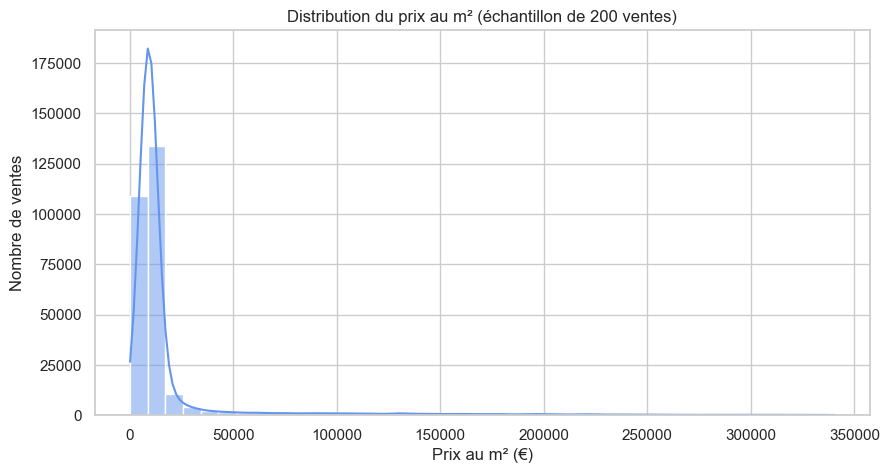

In [15]:
# ===============================================================
# 4️⃣ Statistiques descriptives de base
# ===============================================================

# Calculs simples : moyenne, médiane, écart-type
prix_moyen = df["prix_m2"].mean()
prix_median = df["prix_m2"].median()
prix_ecart = df["prix_m2"].std()

print("\n💡 Indicateurs clés du marché foncier :")
print(f"💶 Prix moyen au m² : {prix_moyen:,.0f} €")
print(f"📊 Prix médian au m² : {prix_median:,.0f} €")
print(f"📈 Écart-type (dispersion des prix) : {prix_ecart:,.0f} €")

# Visualisation de la distribution
plt.figure(figsize=(10,5))
sns.histplot(df["prix_m2"], bins=40, kde=True, color="cornflowerblue")
plt.title("Distribution du prix au m² (échantillon de 200 ventes)")
plt.xlabel("Prix au m² (€)")
plt.ylabel("Nombre de ventes")
plt.show()


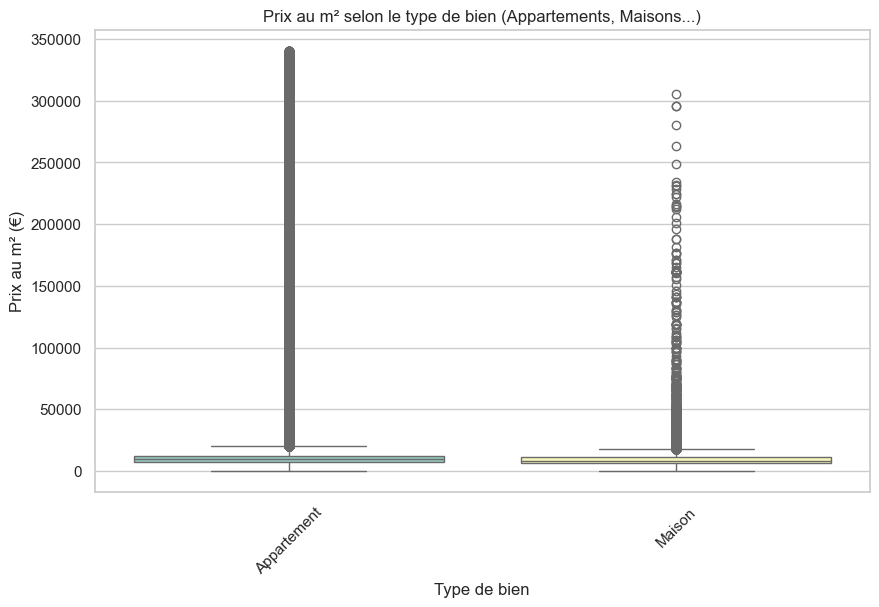

In [16]:
# ===============================================================
# 5️⃣ Analyse par type de bien
# ===============================================================

if "type_local" in df.columns:
    plt.figure(figsize=(10,6))
    
    # ✅ Correction du warning : on précise hue=x et on désactive la légende
    sns.boxplot(
        x="type_local",
        y="prix_m2",
        hue="type_local",       # On lie la couleur à la catégorie de bien
        data=df,
        palette="Set3",
        legend=False
    )
    
    plt.title("Prix au m² selon le type de bien (Appartements, Maisons...)")
    plt.xlabel("Type de bien")
    plt.ylabel("Prix au m² (€)")
    plt.xticks(rotation=45)
    plt.show()


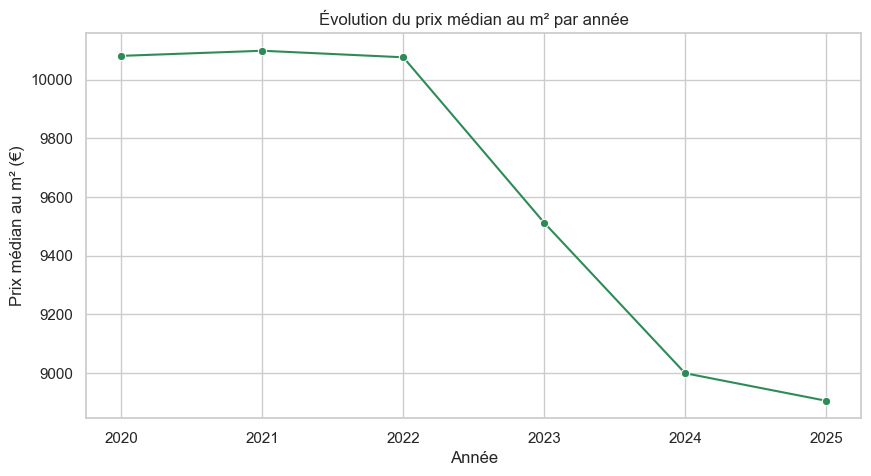

In [17]:
# ===============================================================
# 6️⃣ Évolution du prix dans le temps
# ===============================================================
if "annee" in df.columns:
    prix_temps = df.groupby("annee")["prix_m2"].median().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(x="annee", y="prix_m2", data=prix_temps, marker="o", color="seagreen")
    plt.title("Évolution du prix médian au m² par année")
    plt.xlabel("Année")
    plt.ylabel("Prix médian au m² (€)")
    plt.show()


🏆 Top 10 des communes les plus chères


,nom_commune,prix_m2
0,Paris 6e Arrondissement,15555.555556
1,Paris 7e Arrondissement,15172.758621
2,Paris 4e Arrondissement,13507.142857
3,Paris 1er Arrondissement,13372.394541
4,Paris 8e Arrondissement,13043.478261
5,Paris 5e Arrondissement,12791.713014
6,Paris 3e Arrondissement,12735.849057
7,Paris 2e Arrondissement,12184.810127
8,Paris 9e Arrondissement,11714.285714
9,Paris 16e Arrondissement,11701.758274


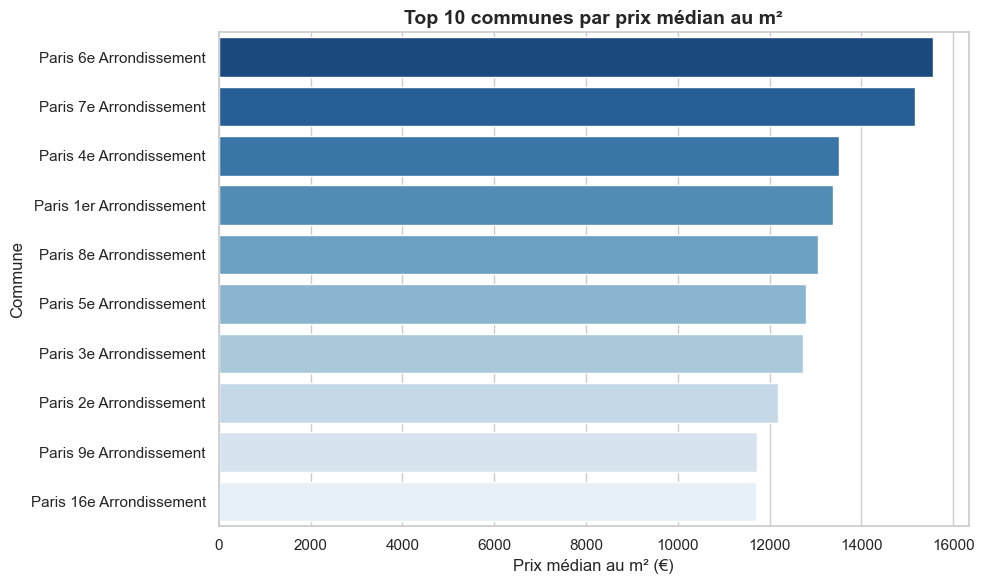

In [18]:
# ===============================================================
# 7️⃣ Classement des communes
# ===============================================================

if "nom_commune" in df.columns:
    # Calcul du prix médian au m² par commune
    prix_commune = (
        df.groupby("nom_commune")["prix_m2"]
        .median()
        .sort_values(ascending=False)
        .reset_index()
    )

    print("\n🏆 Top 10 des communes les plus chères")
    display(prix_commune.head(10))

    # ✅ Correction du FutureWarning : ajout de 'hue' et suppression de la légende inutile
    plt.figure(figsize=(10,6))
    sns.barplot(
        x="prix_m2",
        y="nom_commune",
        data=prix_commune.head(10),
        hue="nom_commune",       # Chaque commune a sa couleur
        palette="Blues_r",
        legend=False             # Pas besoin d’une légende répétitive
    )

    plt.title("Top 10 communes par prix médian au m²", fontsize=14, weight="bold")
    plt.xlabel("Prix médian au m² (€)")
    plt.ylabel("Commune")
    plt.tight_layout()
    plt.show()


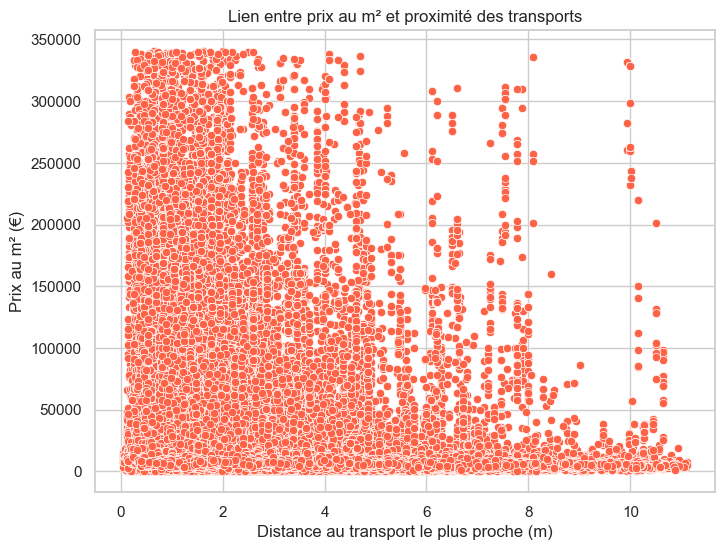

In [19]:
# ===============================================================
# 8️⃣ Analyse transport / prix
# ===============================================================
if "distance_transport_km" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="distance_transport_km", y="prix_m2", data=df, color="tomato")
    plt.title("Lien entre prix au m² et proximité des transports")
    plt.xlabel("Distance au transport le plus proche (m)")
    plt.ylabel("Prix au m² (€)")
    plt.show()
else:
    print("La colonne 'distance_transport' n'existe pas dans le DataFrame.")

In [20]:
# ===============================================================
# 9️⃣ Calcul du score d’attractivité global
# ===============================================================

# Affichage des colonnes disponibles (pour vérifier les noms exacts)
print("Colonnes disponibles :", list(df.columns))

# On prépare les facteurs disponibles pour le score
facteurs = []

# Prix au m² (plus bas = plus attractif financièrement)
if "prix_m2" in df.columns:
    facteur_prix = 1 - (df["prix_m2"] - df["prix_m2"].min()) / (df["prix_m2"].max() - df["prix_m2"].min())
    facteurs.append(facteur_prix)

# Population (plus grande = plus de dynamisme)
if "population" in df.columns:
    facteur_pop = (df["population"] - df["population"].min()) / (df["population"].max() - df["population"].min())
    facteurs.append(facteur_pop)

# Distance aux transports (si présente, plus courte = meilleur score)
# ✅ Correction : on teste plusieurs noms possibles pour être robuste
for col in ["distance_transport_km", "distance_aux_transports", "proximite_transport"]:
    if col in df.columns:
        facteur_transport = 1 - (df[col] - df[col].min()) / (df[col].max() - df[col].min())
        facteurs.append(facteur_transport)
        transport_col = col  # garde le nom trouvé
        break
else:
    transport_col = None  # aucun trouvé

# Si au moins un facteur est disponible, on calcule la moyenne normalisée
if facteurs:
    df["score_attractivite"] = np.mean(facteurs, axis=0)
    print("\n📈 Score d’attractivité calculé (0 = faible, 1 = très fort)")
    
    # Affichage dynamique selon les colonnes présentes
    colonnes_affichees = ["nom_commune", "prix_m2", "population", "score_attractivite"]
    if transport_col:
        colonnes_affichees.insert(2, transport_col)
    
    display(df[colonnes_affichees].head(20))
else:
    print("⚠️ Impossible de calculer le score : aucune variable pertinente trouvée.")


Colonnes disponibles : ['id_mutation', 'date_mutation', 'nature_mutation', 'code_departement', 'code_commune', 'nom_commune', 'code_postal', 'latitude', 'longitude', 'type_local', 'valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'prix_m2', 'annee', 'trimestre', 'type_bien', 'population', 'revenu_median', 'taux_pauvrete', 'nb_espaces_verts', 'superficie_espaces_verts_m2', 'superficie_moyenne_espaces_verts_m2', 'diversite_espaces_verts', 'nb_grands_parcs', 'score_espaces_verts', 'score_espaces_verts_norm', 'est_quartier_vert', 'code_commune_temp', 'loyer_moyen_m2_mois', 'loyer_mensuel_estime', 'loyer_annuel_estime_v2', 'rendement_brut_pct_v2', 'profil_emprunteur', 'taux_interet_pct', 'montant_emprunte', 'apport_initial', 'mensualite', 'cout_total_credit', 'cout_total_acquisition', 'cashflow_mensuel', 'taux_couverture_pct', 'est_cashflow_positif', 'est_effort_modere', 'est_taux_favorable', 'evolution_prix_m2_euros', 'evolution_prix_m2_pct', 'croissance_annuelle_pct',

,nom_commune,prix_m2,distance_transport_km,population,score_attractivite
0,Paris 3e Arrondissement,12333.333333,0.797055,33402,0.678405
1,Paris 1er Arrondissement,10000.000000,0.513413,16030,0.663811
2,Paris 1er Arrondissement,19004.014599,0.808083,16030,0.646109
3,Paris 1er Arrondissement,13238.095238,0.260378,16030,0.668266
4,Paris 1er Arrondissement,13916.666667,0.609887,16030,0.657066
5,Paris 1er Arrondissement,13089.583333,0.738287,16030,0.654006
6,Paris 8e Arrondissement,12728.571429,0.298343,35631,0.696313
7,Paris 3e Arrondissement,28471.428571,0.855402,33402,0.660839
8,Paris 8e Arrondissement,388.800000,0.385300,35631,0.705779
9,Paris 8e Arrondissement,12307.692308,0.652290,35631,0.686056
